In [1]:
# bs4 is a Python library for pulling data out of HTML files.
from bs4 import BeautifulSoup
import os

htmlTables = {}
'''BeautifulSoup is a class. 
 creating an object html.
 object.find() function we are using to find news table
 and adding that to our htmlTables dictionary'''

for table_name in os.listdir('Datasets_byMe'):
    #path to our dataset
    table_path = f'Datasets_byMe/{table_name}'
    #opening in read only mode
    table_file = open(table_path, 'r')
    # reading contents into html
    html = BeautifulSoup(table_file)
    # finding news-table in 'html_table'
    html_table = html.find(id='news-table')
   
    htmlTables[table_name] = html_table

#printing name and content of news-tables saved in htmlTables
for i, j in htmlTables.items():
    print(i)
    print("\n\n")
    #count +=1
    if i == "tsla_oct2021.html":
        print(f"{j}\n\n\n")

fb_oct2021.html



hdb_oct2021.html



infy_oct2021.html



tsla_oct2021.html



<table border="0" cellpadding="1" cellspacing="0" class="fullview-news-outer" id="news-table" width="100%">
<tr><td align="right" style="white-space:nowrap" width="130">Nov-11-21 04:02AM  </td><td align="left"><div class="news-link-container"><div class="news-link-left"><a class="tab-link-news" href="https://www.barrons.com/articles/elon-musk-sells-tesla-shares-51636621314?siteid=yhoof2" target="_blank">Elon Musk Sells $5 Billion Worth of Tesla Shares. The Stock Is Rising.</a></div><div class="news-link-right"><span style="color:#aa6dc0;font-size:9px"> Barrons.com</span></div></div></td></tr>
<tr><td align="right" width="130">02:23AM  </td><td align="left"><div class="news-link-container"><div class="news-link-left"><a class="tab-link-news" href="https://finance.yahoo.com/news/tesla-shares-rise-frankfurt-musks-072342405.html" target="_blank">Tesla shares rise in Frankfurt after Musk's $5 billion stock sale

In [2]:
'''We grabbed the table that contains the headlines from each stocks HTML file, 
   trying to understand how the data has been structured
   in the table before we parse the tables further
   Reading one single file of headlines '''
#taking headlines from tsla dated october 2021 in html file
tsla = htmlTables['hdb_oct2021.html']
# Get all the table rows tagged in HTML with <tr> tablerow into tesla_tr
tsla_tr = tsla.findAll('tr')

print("Number of headlines on this day :", len(tsla_tr))

#exploring data for better understanding
#For each row
for i, table_row in enumerate(tsla_tr):
    # Reading text of the element 'a' into linkText as a has link texts in html
    linkText = table_row.a.get_text()
    # Reading the text of the element 'td' into dataText where td is table data cells
    dataText = table_row.td.get_text()
    # Print the count of the number of files
    print(f"File number {i+1}:")
    # Print the contents of linkText and dataText
    print(linkText)
    print(dataText)
    # exiting the loop after first 10 files as this is for exploring only
    if i == 9:
        break

Number of headlines on this day : 100
File number 1:
Top Indian Mortgage Lenders Profit Rises on Dividend Income
Nov-01-21 06:17AM  
File number 2:
HDFC Bank Limited (HDB): Hedge Funds Are Snapping Up
Oct-12-21 07:16PM  
File number 3:
Cathie Woods Fintech ETF Sells HDFC Bank First Time Since May
Sep-02-21 11:30PM  
File number 4:
India's HDFC Bank aims to reclaim credit card market share in coming quarters
Aug-23-21 05:21AM  
File number 5:
Indian shares snap multi-day rally as banks, metal stocks slip
Aug-18-21 12:20AM  
File number 6:
India ETFs Hit Record High Ahead of Central Bank Meeting
Aug-04-21 09:42AM  
File number 7:
Is HDFC Bank Limited (HDB) A Smart Long-Term Buy?
Aug-02-21 12:54PM  
File number 8:
TD vs. HDB: Which Stock Is the Better Value Option?
Jul-30-21 11:40AM  
File number 9:
HDFC Bank Limited 20-F Available Online
Jul-28-21 10:00AM  
File number 10:
HDFC Bank Limited (HDB) Q1 2022 Earnings Call Transcript
Jul-25-21 07:37AM  


In [3]:
'''
creating empty list for holding parsed news
and iterating through it
'''
parsedNews = []
#earlier we did this for a single file now doing for all
for fileName, newsTable in htmlTables.items():
    # Iterate through all tr tags in 'newsTable'
    for x in newsTable.findAll('tr'):
        # Read the text from the tr tag into text
        text = x.get_text() 
        
        # Split the text in the td tag into a list 
        #considering it may contain both time and date or only time
        dateScrape = x.td.text.split()
        # If the length of dateScrape is 1, load 'time' as the only element
        # If is not, load 'date' as the 1st element and 'time' as the second
        if len(dateScrape) == 1:
            time = dateScrape[0]
        else:
            date = dateScrape[0]
            time = dateScrape[1]
        #ticker is short form name upto first '_' in filename we are considering for stock market information or news reports.
        # Extract the ticker from the file name  
        ticker = fileName.split("_")[0]
        # Appending ticker, date, time and headline as a list to the 'parsed_news' list
        parsedNews.append([ticker, date, time, x.a.text])

In [4]:
print(parsedNews)

[['fb', 'Nov-10-21', '09:32PM', 'SHAREHOLDER ALERT: Levi & Korsinsky, LLP Notifies Shareholders of Meta Platforms, Inc. f.k.a. Facebook, Inc. of a Class Action Lawsuit and a Lead Plaintiff Deadline of December 27, 2021 - FB'], ['fb', 'Nov-10-21', '09:07PM', 'China Crackdown Hammers Growth at National Champion Tencent'], ['fb', 'Nov-10-21', '08:00PM', 'INVESTOR ALERT - Labaton Sucharow Notifies Meta Platforms, Inc. f/k/a Facebook, Inc. (NASDAQ:FB) Investors of Securities Class Action'], ['fb', 'Nov-10-21', '07:01PM', "Solana  why Ethereum's lesser known rival is steadily rising"], ['fb', 'Nov-10-21', '07:01PM', 'WhatsApp launches scam awareness campaign'], ['fb', 'Nov-10-21', '05:01PM', 'Facebook under fire for supreme court failings'], ['fb', 'Nov-10-21', '04:03PM', 'UPDATE 2-Cuba says United States, Facebook helping to foment Nov. 15 protests'], ['fb', 'Nov-10-21', '03:59PM', 'Why AMD Stock Fell 7% Today'], ['fb', 'Nov-10-21', '03:55PM', 'SHAREHOLDER ALERT: FB HMLP CEI: The Law Office

In [5]:
# most used library for NLP
import nltk
#nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
# SentimentIntensityAnalyzer is used to determine intensity of word, positivity or negativity etc.

In [6]:
# words and values 
wordIntensityScores = {
    'crushes': 10,
    'beats': 5,
    'misses': -5,
    'trouble': -10,
    'falls': -15,
    'bullish': 7,
    'bearish':-7,
    'short':-10, # you sell 
    'sell':-7,
    'breakout':4,
    'crushed': 8,
    'dip':-4,
    'crahs':-10,
    'tanks':-3,
    'high':3,
    'low':-3,
    'rising':3,
    'down':-2,
}

# Instantiate the sentiment intensity analyzer with the existing lexicon
vader = SentimentIntensityAnalyzer()
# print(vader.lexicon)

# Updating the lexicon with the above values for specifically stock
vader.lexicon.update(wordIntensityScores)

In [9]:
import speech_recognition as sr
from tkinter import *
root = Tk()
root.title("News Headline Stock Sentiment Analysis")
root.geometry("500x100")
root.configure(bg ="#031163")
r3 = sr.Recognizer()

with sr.Microphone() as source:
    r3.adjust_for_ambient_noise(source)
    print("Speak Now")
    #for example say stocks are falling
    audio = r3.listen(source)
    
    try:
        text = r3.recognize_google(audio)
        print("You said : " + text)
        score = vader.polarity_scores(text)
        print(score)
        ss = float(vader.polarity_scores(text)['compound'])
        print(ss)
        if ss > 0.0:
            title_label = Label(root, text = "Depicts positive stock sentiment", font = ("Helvetica",18), fg= "#070e57", bg = "#7ddae8")
            title_label.grid(row=0,column=0,columnspan=3,pady="20")
            print("\nDepicts positive stock sentiment\n")
        elif ss < 0.0:
            title_label1 = Label(root, text = "Depicts negative stock sentiment", font = ("Helvetica",18), fg= "#070e57", bg = "#7ddae8")
            title_label1.grid(row=0,column=0,columnspan=3,pady="20")
            print("\nDepicts negative stock sentiment\n")
        else:
            title_label2 = Label(root, text = "Depicts neutral stock sentiment", font = ("Helvetica",18), fg= "#070e57", bg = "#7ddae8")
            title_label2.grid(row=0,column=0,columnspan=3,pady="20")
            print("\nDepicts neutral sentiment\n")
        
    except sr.UnknownValueError:
        print("Could not understand")
    except sr.RequestError as e:
        print("Could not request results")
root.mainloop()

Speak Now
You said : there is a DIP in the market prices
{'neg': 0.489, 'neu': 0.511, 'pos': 0.0, 'compound': -0.7739}
-0.7739

Depicts negative stock sentiment



In [11]:
# using audio files
import speech_recognition as sr
from tkinter import *
root = Tk()
root.title("News Headline Stock Sentiment Analysis")
root.geometry("500x100")
root.configure(bg ="#031163")


financialNews1 = ("Ai_audio1.wav")

r = sr.Recognizer()
  
with sr.AudioFile(financialNews1) as source:
    #reads the audio file. Here we use record instead of listening
    audio = r.record(source)  
  
try:
    audioText = r.recognize_google(audio)
    print("The audio file contains: " + audioText)
    score = vader.polarity_scores(audioText)
    print(score)
    ss = vader.polarity_scores(audioText)['compound']
    if ss > 0.0:
        title_label = Label(root, text = "Depicts positive stock sentiment", font = ("Helvetica",18), fg= "#070e57", bg = "#7ddae8")
        title_label.grid(row=0,column=0,columnspan=3,pady="20")
        print("\nDepicts positive stock sentiment\n")
    elif ss < 0.0:
        title_label1 = Label(root, text = "Depicts negative stock sentiment", font = ("Helvetica",18), fg= "#070e57", bg = "#7ddae8")
        title_label1.grid(row=0,column=0,columnspan=3,pady="20")
        print("\nDepicts negative stock sentiment\n")
    else:
        title_label2 = Label(root, text = "Depicts neutral stock sentiment", font = ("Helvetica",18), fg= "#070e57", bg = "#7ddae8")
        title_label2.grid(row=0,column=0,columnspan=3,pady="20")
        print("\nDepicts neutral sentiment\n")
  
except sr.UnknownValueError:
    print("Could not understand audio")
  
except sr.RequestError as e:
    print("Could not request results from Google Speech")
root.mainloop()

The audio file contains: sex Nifty Falls as banks financial stocks track Nayaka Paytm infocus
{'neg': 0.578, 'neu': 0.325, 'pos': 0.097, 'compound': -0.9601}

Depicts negative stock sentiment



In [12]:
import pandas as pd

# Using these as column names
columns = ['ticker', 'date', 'time', 'headline']

# Convert the list of lists into a DataFrame
# as earlier for every news headline there was a single list with many lists in it
scoredNews = pd.DataFrame(parsedNews, columns = columns)

# Iterate through the headlines and get the polarity(intensity) scores
# head is each instance of headline
scores = [vader.polarity_scores(head) for head in scoredNews.headline]

# polarity scores returns in dictionary form
# Converting the list of dictionaries into a DataFrame
scoresDF = pd.DataFrame(scores)

# Join the DataFrames of headlines with polarity scores 
scoredNews = scoredNews.join(scoresDF)

# Converting the date column from string to datetime
scoredNews['date'] = pd.to_datetime(scoredNews.date).dt.date


In [13]:
print(scores)
# scores are in terms negative, neutral, positive, compound
# compound score is sum of positive, negative & neutral scores which is then normalized between -1 and +1

[{'neg': 0.064, 'neu': 0.838, 'pos': 0.098, 'compound': 0.2577}, {'neg': 0.0, 'neu': 0.48, 'pos': 0.52, 'compound': 0.7579}, {'neg': 0.0, 'neu': 0.745, 'pos': 0.255, 'compound': 0.6289}, {'neg': 0.0, 'neu': 0.667, 'pos': 0.333, 'compound': 0.6124}, {'neg': 0.481, 'neu': 0.519, 'pos': 0.0, 'compound': -0.5719}, {'neg': 0.424, 'neu': 0.303, 'pos': 0.273, 'compound': -0.25}, {'neg': 0.119, 'neu': 0.566, 'pos': 0.314, 'compound': 0.4767}, {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, {'neg': 0.0, 'neu': 0.772, 'pos': 0.228, 'compound': 0.5766}, {'neg': 0.0, 'neu': 0.598, 'pos': 0.402, 'compound': 0.5719}, {'neg': 0.117, 'neu': 0.735, 'pos': 0.148, 'compound': 0.3034}, {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, {'neg': 0.224, 'neu': 0.776, 'pos': 0.0, 'compound': -0.3818}, {'neg': 0.055, 'neu': 0.808, 'pos':

In [14]:
print(scoredNews)

    ticker        date     time  \
0       fb  2021-11-10  09:32PM   
1       fb  2021-11-10  09:07PM   
2       fb  2021-11-10  08:00PM   
3       fb  2021-11-10  07:01PM   
4       fb  2021-11-10  07:01PM   
..     ...         ...      ...   
395   tsla  2021-11-09  08:15AM   
396   tsla  2021-11-09  08:10AM   
397   tsla  2021-11-09  08:00AM   
398   tsla  2021-11-09  07:55AM   
399   tsla  2021-11-09  07:31AM   

                                              headline    neg    neu    pos  \
0    SHAREHOLDER ALERT: Levi & Korsinsky, LLP Notif...  0.064  0.838  0.098   
1    China Crackdown Hammers Growth at National Cha...  0.000  0.480  0.520   
2    INVESTOR ALERT - Labaton Sucharow Notifies Met...  0.000  0.745  0.255   
3    Solana  why Ethereum's lesser known rival is s...  0.000  0.667  0.333   
4            WhatsApp launches scam awareness campaign  0.481  0.519  0.000   
..                                                 ...    ...    ...    ...   
395  Whats Really Behind E

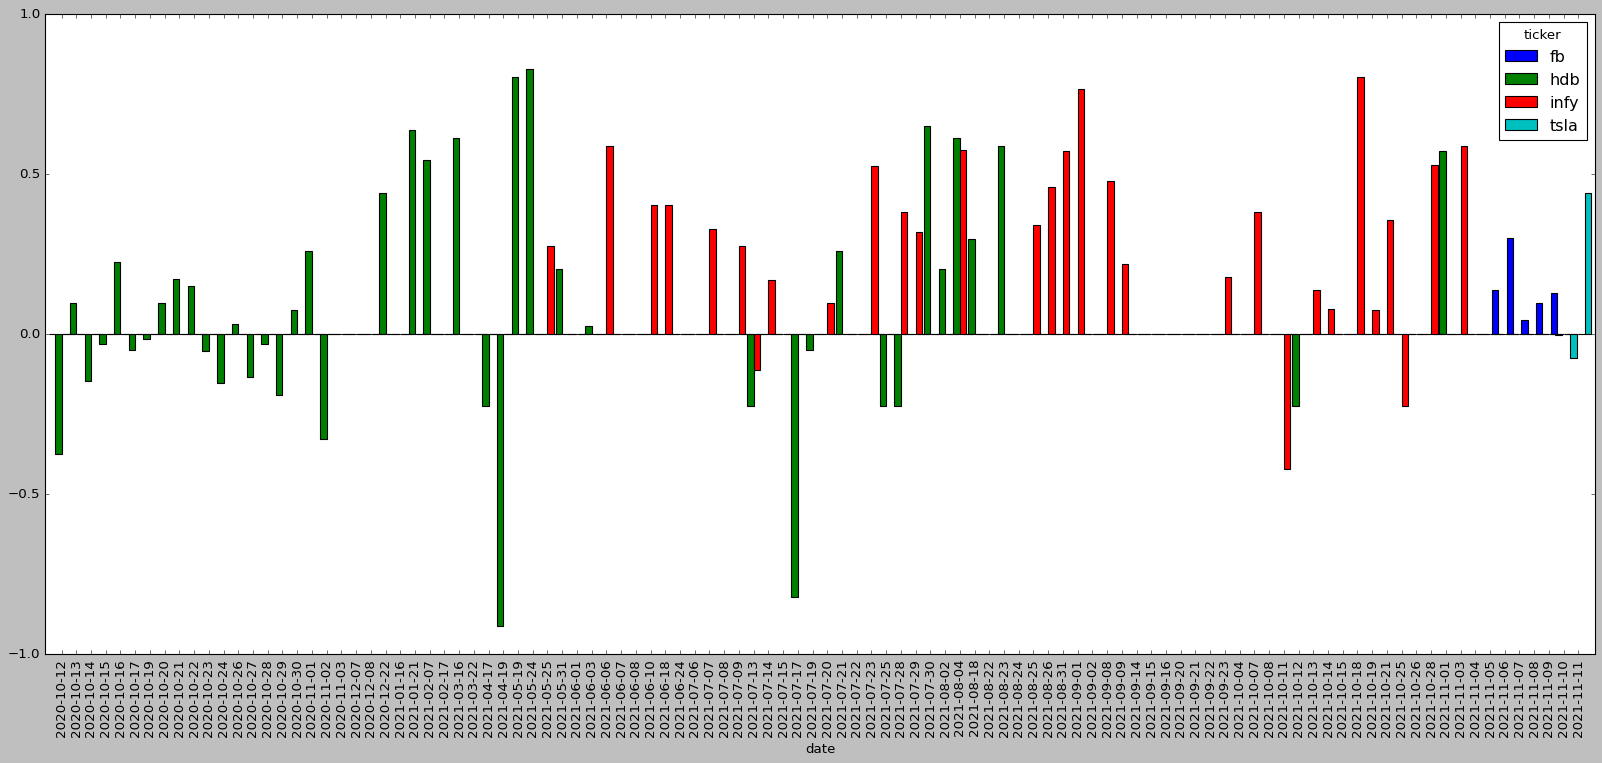

In [15]:
import matplotlib.pyplot as plt
plt.style.use("classic")
%matplotlib inline

# Group by date and ticker columns from scored_news and calculate the mean
mean_c = scoredNews.groupby(['date', 'ticker']).mean();

# Unstack the column ticker
mean_c = mean_c.unstack('ticker');

# Get the cross-section of compound in the 'columns' axis
mean_c = mean_c.xs('compound', axis='columns');

# Plot a bar chart with pandas
mean_c.plot.bar(figsize = (25, 10), width = 1.75);
# stock sentiments date wise of fb tsla hdb and infy

In [16]:
# Count the number of headlines in scoredNews 
numNewsBefore = scoredNews.headline.count()

# Dropping duplicates based on ticker and headline
scoredNewsClean = scoredNews.drop_duplicates(subset= ['headline', 'ticker'])

# Counting number of headlines after dropping duplicates
numNewsAfter = scoredNewsClean.headline.count()

# Printing before and after numbers to get an idea of how we did 
print(f"Before we had {numNewsBefore} headlines, now we have {numNewsAfter}")
print("Number of dropped headlines are", numNewsBefore-numNewsAfter)


Before we had 400 headlines, now we have 355
Number of dropped headlines are 45


In [18]:
# Setting the index to ticker and date
import warnings
warnings.filterwarnings("ignore")

singleDay = scoredNewsClean.set_index(['ticker', 'date'])
#print(single_day.head(1))
# Cross-section the fb row
singleDay = singleDay.xs('tsla')
#print(single_day)
# Selecting by locating the 9th November 2021
singleDay = singleDay.loc[pd.Timestamp('2021-11-09')]

#Converting the datetime string to just the time
singleDay['time'] = pd.to_datetime(singleDay['time']).dt.time

# Set the index to time 
singleDay = singleDay.set_index('time')

# Sort it
singleDay = singleDay.sort_index()

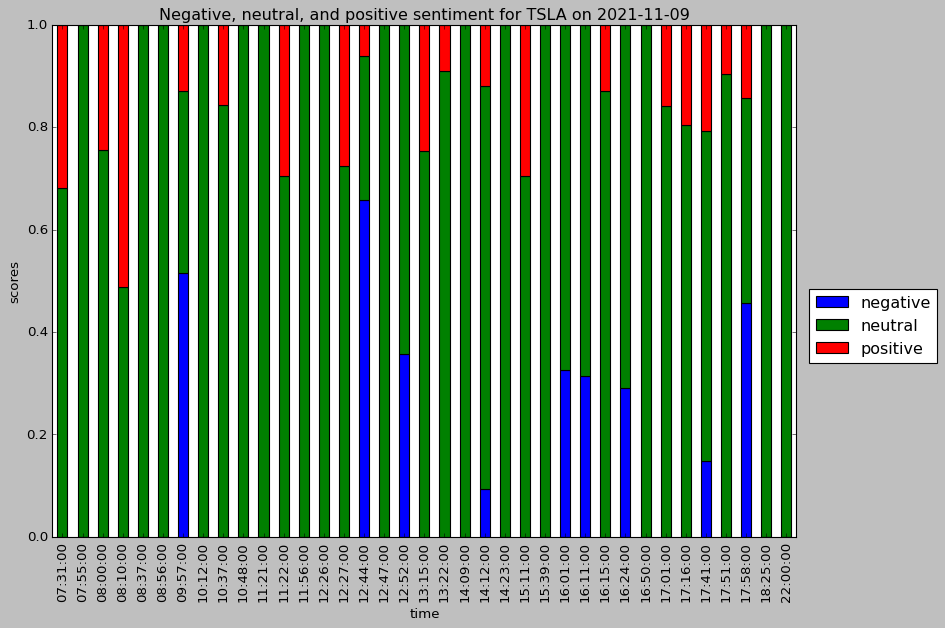

In [19]:
TITLE = "Negative, neutral, and positive sentiment for TSLA on 2021-11-09"

# Drop the columns that aren't useful for the plot
plotDay = singleDay.drop(['compound', 'headline'], 1)

# Change the column names to 'negative', 'positive', and 'neutral'
plotDay.columns = ['negative', 'neutral', 'positive']

# Plot a stacked bar chart
plotDay.plot.bar(stacked=True, figsize=(12, 8), title=TITLE).legend(bbox_to_anchor=(1.2, 0.5))
plt.ylabel('scores');

In [21]:
# Setting the index to ticker and date
singleDay2 = scoredNewsClean.set_index(['ticker', 'date'])
#print(single_day.head(1))
# Cross-section the fb row
singleDay2 = singleDay2.xs('infy')
#print(single_day)
# Selecting 
singleDay2 = singleDay2.loc[pd.Timestamp('2021-10-13')]

#Converting the datetime string to just the time
singleDay2['time'] = pd.to_datetime(singleDay2['time']).dt.time

# Set the index to time 
singleDay2 = singleDay2.set_index('time')

# Sort it
singleDay2 = singleDay2.sort_index()

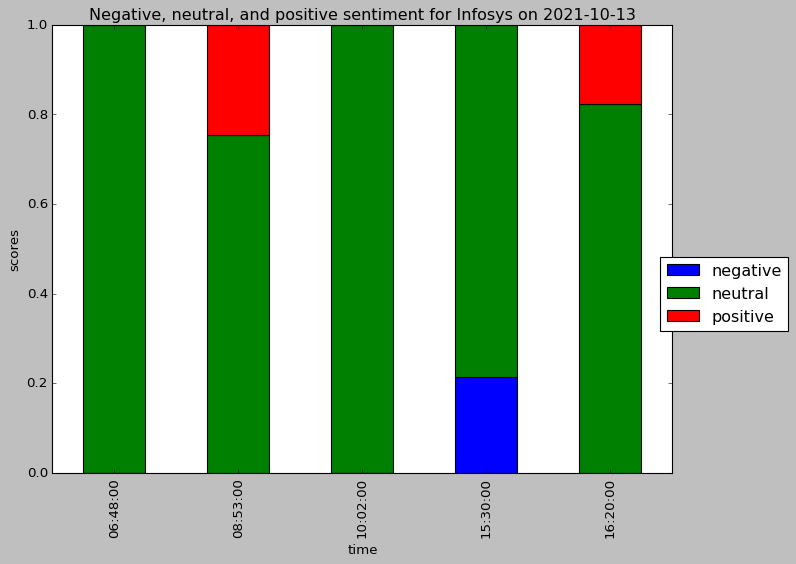

In [22]:
TITLE = "Negative, neutral, and positive sentiment for Infosys on 2021-10-13"

# Drop the columns that aren't useful for the plot
plotDay = singleDay2.drop(['compound', 'headline'], 1)

# Change the column names to 'negative', 'positive', and 'neutral'
plotDay.columns = ['negative', 'neutral', 'positive']

# Plot a stacked bar chart
plotDay.plot.bar(stacked=True, figsize=(10, 7), title=TITLE).legend(bbox_to_anchor=(1.2, 0.5))
plt.ylabel('scores');